<a href="https://colab.research.google.com/github/rajy4683/S15FinalRun/blob/master/S15Unet_Expand_0to1L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun May 24 21:55:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')
sys.path.append('/content/drive/My Drive/EVA4')
sys.path.append('/content/drive/My Drive/EVA4/DenseDepth')

### Dependencies


In [4]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |████████████████████████████████| 112kB 2.9MB/s 
     |████████████████████████████████| 1.4MB 8.5MB/s 
     |████████████████████████████████| 163kB 15.3MB/s 
     |████████████████████████████████| 112kB 15.7MB/s 
     |████████████████████████████████| 102kB 7.9MB/s 
     |████████████████████████████████| 460kB 13.4MB/s 
     |████████████████████████████████| 102kB 9.2MB/s 
     |████████████████████████████████| 634kB 18.4MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=1a4665c70402c53deb568e27da5abb85d869cc4f315b9ef0977c69a965a7a309
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=e24827ee692d4782084f08f0cd4849700dba13595df3bed6b75dc6e328b650c2
  Stored in directory: /root/.cache/pip/w

In [5]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-_hvgyqv7
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-_hvgyqv7
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65038 sha256=ec75cff6667d102cd74db90148dd72b0c4fb9a1c182e030036d2b48b0198a3c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-tap1t8ia/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [6]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.color import label2rgb

import albumentations as A
import random
from google.colab.patches import cv2_imshow
from PIL import Image
import glob
import pandas as pd

import torch
from zipfile import ZipFile
import re
import h5py
import time



In [8]:
%load_ext autoreload
%autoreload 2
import torch
import torchvision
import torchvision.transforms as transforms
from RekogNizer import hyperparams


from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, Cutout, MotionBlur
from albumentations import (
    HorizontalFlip, Compose, RandomCrop, Cutout,Normalize, HorizontalFlip, RandomBrightnessContrast,
    Resize,RandomSizedCrop, MotionBlur,MultiplicativeNoise,InvertImg, IAAFliplr,
	IAAPerspective,
)
from albumentations.pytorch import ToTensor
import random

from torchvision.datasets.vision import VisionDataset
from torchvision.datasets.utils import check_integrity, download_and_extract_archive
import os
import sys
import numpy as np
from torchvision import datasets
#from RekogNizer import imgnetloader
from RekogNizer import basemodelclass
from RekogNizer import mmdlrfinder

from RekogNizer import mmdtraintest
from RekogNizer import mmddataloader
from RekogNizer import mmdlosses
from RekogNizer import mmdmodels

from RekogNizer import hyperparams
from RekogNizer import fileutils

from torch.utils.data import Dataset
import shutil
from tqdm import tqdm
from RekogNizer import mmdmodels

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, OneCycleLR, MultiStepLR, CyclicLR, ReduceLROnPlateau


import kornia

import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import wandb

  pip install torch-lr-finder -v --global-option="amp"
  pip install torch-lr-finder -v --global-option="amp"


### Mask Image (Mean and Variance
Mask Mean:0.057950844077600344, Mask StdDev:0.0016620444341229432
### Depth mean and Variance
Depth Mean:0.3679109312239146, Depth StdDev:0.03551773442719045

In [0]:
!rm -rf /content/train && mkdir -p /content/train
!rm -rf /content/test && mkdir -p /content/test

In [0]:
tqdm._instances.clear()

In [10]:
%%time
csv_file ='/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTrain.csv'
root_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/'
batch_start = 50000
batch_end = batch_start+50000
dest_dir="/content/train"

mmddataloader.extract_data_files(csv_file, root_dir, batch_start,batch_end, dest_dir=dest_dir)


Extracting image and mask files


image_mask_gt1k2k.zip mask_196a477c20_classroom_9.jpg: 100%|██████████| 16992/16992 [01:06<00:00, 255.37it/s]
image_mask_gt2k6k.zip mask_fdfc69b5ef_corridor4.jpg: 100%|██████████| 33032/33032 [02:32<00:00, 216.41it/s]
image_mask_gt6k8k.zip mask_27be6f15a4_mylobby_25.jpg: 100%|██████████| 16404/16404 [01:38<00:00, 165.97it/s]
image_mask_gt8k12k.zip mask_357b60605c_meetin_room_8.jpg: 100%|██████████| 33574/33574 [03:15<00:00, 172.15it/s]


Extracting depth files


depth_mask_gt_1k2k.zip depth_image_196a477c20_classroom_9.jpg: 100%|██████████| 8496/8496 [01:06<00:00, 127.00it/s]
depth_mask_gt_2k6k.zip depth_image_fdfc69b5ef_corridor4.jpg: 100%|██████████| 16516/16516 [01:54<00:00, 143.66it/s]
depth_mask_gt_6k8k.zip depth_image_27be6f15a4_mylobby_25.jpg: 100%|██████████| 8202/8202 [01:09<00:00, 117.44it/s]
depth_mask_gt_8k12k.zip depth_image_357b60605c_meetin_room_8.jpg: 100%|██████████| 16787/16787 [02:06<00:00, 132.61it/s]


Extracting bg files
Total file count:150113 
CPU times: user 3min 42s, sys: 58.7 s, total: 4min 40s
Wall time: 15min 47s


### Dataloaders

In [0]:
size_hw = (224,224)
dest_dir="/content/train"
train_batch_size = 64
depth_dataset = mmddataloader.DepthMaskDataSet(csv_file, dest_dir, batch_start,batch_end, read_zip=False,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                 transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_opt=mmddataloader.flip,
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':8,'pin_memory': True}
train_loader = DataLoader(depth_dataset, batch_size=train_batch_size, shuffle=False, **kwargs)

In [12]:
test_csv_file ='/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTest.csv'
root_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/'
test_batch_start = 100000
test_batch_end = test_batch_start + 2000
test_dest_dir = "/content/test"

mmddataloader.extract_data_files(test_csv_file, root_dir, test_batch_start,test_batch_end, dest_dir=test_dest_dir)

Extracting image and mask files


image_mask_gt8k12k.zip mask_309da07188_mylobby_21.jpg: 100%|██████████| 4002/4002 [00:17<00:00, 230.31it/s]


Extracting depth files


depth_mask_gt_8k12k.zip depth_image_309da07188_mylobby_21.jpg: 100%|██████████| 2001/2001 [00:04<00:00, 409.66it/s]


Extracting bg files
Total file count:6010 


In [0]:
size_hw = (224,224)
test_dest_dir = "/content/test"
test_batch_size=64
test_dataset = mmddataloader.DepthMaskDataSet(test_csv_file, test_dest_dir, test_batch_start,test_batch_end,read_zip=False,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                 transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':8,'pin_memory': True}
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False, **kwargs)

In [0]:
# from RekogNizer import mmdbetamodels
# device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
# model_new  =mmdmodels.UNet(n_channels=6, n_classes=2)

# expand_model_old  =mmdmodels.CustomUNet(model_new,n_channels=6, n_classes=2)
# expand_model_old = mmdtraintest.load_model_for_infer(expand_model_old, 
#                                   '/content/drive/My Drive/EVA4/model_saves/model-150cfeb3dc.h5',
#                                   device)
# new_expand_net = mmdbetamodels.ExpandUNet(expand_model_old, n_channels=6, n_classes=2)
# trainable_param_list = [param[1] for param in new_expand_net.named_parameters()][-18:]

In [0]:
from RekogNizer import mmdtraintest
from RekogNizer import mmdlosses

# criterion={"mask":[mmdlosses.LocalBCELoss, mmdlosses.LocalSSIMLoss ], 
#            "depth":[mmdlosses.LocalL1Loss, mmdlosses.LocalSSIMLoss]}
criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalSSIMLoss ], "depth":[mmdlosses.LocalRMSELoss]}
#model = basemodelclass.MonoMaskDepthResNetFunc()
optimizer=optim.SGD(expand_model_params, lr=0.001,momentum=0.9,  weight_decay=0)
lrfinder = mmdtraintest.find_lr_type1(expand_model, optimizer, criterion, train_loader, testloader=None, seed=1, start_lr=0.0001, end_lr=1, step_mode="exp",num_iter=100)



Learning rate search finished. See the graph with {finder_name}.plot()


0.02754228703338166 1.0 1.0939154624938965
{'lr': [0.00010964781961431851, 0.0001202264434617413, 0.0001318256738556407, 0.00014454397707459274, 0.00015848931924611136, 0.00017378008287493755, 0.00019054607179632473, 0.00020892961308540398, 0.00022908676527677731, 0.000251188643150958, 0.0002754228703338166, 0.00030199517204020164, 0.00033113112148259116, 0.0003630780547701014, 0.00039810717055349724, 0.00043651583224016605, 0.00047863009232263843, 0.0005248074602497726, 0.000575439937337157, 0.0006309573444801934, 0.0006918309709189364, 0.0007585775750291837, 0.0008317637711026711, 0.0009120108393559097, 0.001, 0.0010964781961431851, 0.0012022644346174132, 0.0013182567385564075, 0.0014454397707459273, 0.0015848931924611134, 0.0017378008287493754, 0.0019054607179632473, 0.00208929613085404, 0.0022908676527677737, 0.0025118864315095794, 0.0027542287033381664, 0.003019951720402016, 0.0033113112148259113, 0.0036307805477010144, 0.003981071705534973, 0.004365158322401658, 0.004786300923226

loss=1.071497 m_loss=0.881439 d_loss=0.190058 batch_id=111:  71%|███████▏  | 112/157 [37:44<15:09, 20.22s/it]
Traceback (most recent call last):
loss=1.098038 m_loss=0.877760 d_loss=0.220278 batch_id=44:  29%|██▊       | 45/157 [23:49<59:16, 31.76s/it]  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.6/multiprocessing/

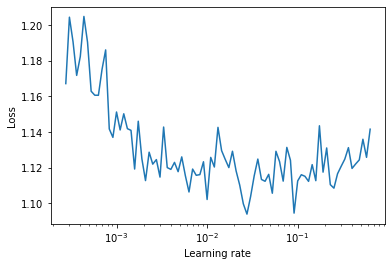

In [0]:
min_lr = lrfinder.history['lr'][np.argmin(lrfinder.history['loss'])]
max_lr = np.max(lrfinder.history['lr'])
print(min_lr, max_lr, np.min(lrfinder.history['loss']))
print(lrfinder.history)
lrfinder.plot()

In [0]:
summary(model_new, input_size=(6,64,64)  )

In [0]:
del model_new,expand_model
torch.cuda.empty_cache()

In [0]:
lrfinder.reset()

In [0]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
model_new  =mmdmodels.UNet(n_channels=6, n_classes=2)

# model_new = mmdtraintest.load_model_for_infer(model_new, 
#                                   '/content/drive/My Drive/EVA4/model_saves/model-d4f23f75a2.h5',
#                                   device)

# model_new = mmdtraintest.load_model_for_infer(model_new, 
#                                    '/content/drive/My Drive/EVA4/model_saves/model-23fcf0a1cf.h5',
#                                    device)
expand_model  =mmdmodels.CustomUNet(model_new,n_channels=6, n_classes=2)

In [0]:
expand_model = mmdtraintest.load_model_for_infer(expand_model, 
                                  #'/content/drive/My Drive/EVA4/model_saves/model-33e4abd6ba.h5',
                                  #'/content/drive/My Drive/EVA4/model_saves/model-1eb579ecbd.h5',
                                  #'/content/drive/My Drive/EVA4/model_saves/model-1fcbc18532.h5',
                                  '/content/drive/My Drive/EVA4/model_saves/model-2a730cf92a.h5',
                                  device)
#model_new_params = ['baseUNet.'+param[0] for param in list(model_new.named_parameters()) ]
#model_new_params = ['baseUNet.'+param[0] for param in list(model_new.named_parameters()) if not re.search("inc", param[0])]
#expand_model_params = [param[1] for param in list(expand_model.named_parameters()) if param[0] not in model_new_params]

In [0]:
#model_new_params = ['baseUNet.'+param[0] for param in list(model_new.named_parameters()) ]

model_new_params = ['baseUNet.'+param[0] for param in list(model_new.named_parameters()) if not re.search("inc", param[0])]
expand_model_param_name = [param[0] for param in list(expand_model.named_parameters()) if param[0] not in model_new_params]

In [0]:
len(expand_model_params)

27

### Current Run

In [16]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['lr'] = 0.02754228703338166 #0.1
hyperparams.hyperparameter_defaults['ocp_max_lr'] = 0.02754228703338166 #0.1

print("Initializing datasets and dataloaders")    

#model_new =  mmdmodels.UNet(n_channels=6, n_classes=2)
wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

# optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
#                         weight_decay=0)
optimizer=optim.SGD(expand_model.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=2e-5)
#expand_model_params
# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
#           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}


#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=True, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.208,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(expand_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

Initializing datasets and dataloaders


  0%|          | 0/782 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.02754228703338166
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.02754228703338166
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 2ff807d1d0
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value:

loss=0.932968 m_loss=0.865871 d_loss=0.067097 batch_id=781: 100%|██████████| 782/782 [08:33<00:00,  1.52it/s]
loss=0.928180 m_loss=0.847097 d_loss=0.081083 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]



Epoch: 1 Train set: Average loss: 0.936255, Mask loss:0.875026, Depth loss:0.061230, lr:0
Epoch: 1 Test set: Average loss: 0.941049, Mask loss:0.875676, Depth loss:0.065372
Model saved as Test loss reduced from  10000.0  to  0.9410485625267029


loss=0.928072 m_loss=0.866001 d_loss=0.062071 batch_id=781: 100%|██████████| 782/782 [08:33<00:00,  1.52it/s]
loss=0.927850 m_loss=0.846859 d_loss=0.080991 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]



Epoch: 2 Train set: Average loss: 0.935293, Mask loss:0.874985, Depth loss:0.060309, lr:0
Epoch: 2 Test set: Average loss: 0.940785, Mask loss:0.875424, Depth loss:0.065361
Model saved as Test loss reduced from  0.9410485625267029  to  0.9407854676246643


loss=0.925003 m_loss=0.865461 d_loss=0.059542 batch_id=781: 100%|██████████| 782/782 [08:28<00:00,  1.54it/s]
loss=0.928130 m_loss=0.847066 d_loss=0.081063 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.934516, Mask loss:0.874950, Depth loss:0.059567, lr:0
Epoch: 3 Test set: Average loss: 0.940981, Mask loss:0.875617, Depth loss:0.065364


loss=0.923108 m_loss=0.865198 d_loss=0.057910 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.928079 m_loss=0.846961 d_loss=0.081118 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 4 Train set: Average loss: 0.933729, Mask loss:0.874795, Depth loss:0.058935, lr:0
Epoch: 4 Test set: Average loss: 0.940874, Mask loss:0.875492, Depth loss:0.065382


loss=0.922194 m_loss=0.865505 d_loss=0.056689 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.928582 m_loss=0.847425 d_loss=0.081157 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 5 Train set: Average loss: 0.933192, Mask loss:0.874818, Depth loss:0.058374, lr:0
Epoch: 5 Test set: Average loss: 0.941353, Mask loss:0.875936, Depth loss:0.065417


loss=0.920931 m_loss=0.865241 d_loss=0.055690 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928139 m_loss=0.846982 d_loss=0.081157 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.932628, Mask loss:0.874761, Depth loss:0.057867, lr:0
Epoch: 6 Test set: Average loss: 0.940929, Mask loss:0.875482, Depth loss:0.065447


loss=0.920274 m_loss=0.865407 d_loss=0.054867 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928392 m_loss=0.847224 d_loss=0.081168 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 7 Train set: Average loss: 0.932124, Mask loss:0.874721, Depth loss:0.057402, lr:0
Epoch: 7 Test set: Average loss: 0.941214, Mask loss:0.875733, Depth loss:0.065480


loss=0.918826 m_loss=0.864681 d_loss=0.054145 batch_id=781: 100%|██████████| 782/782 [08:31<00:00,  1.53it/s]
loss=0.928083 m_loss=0.846877 d_loss=0.081206 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 8 Train set: Average loss: 0.931657, Mask loss:0.874686, Depth loss:0.056972, lr:0
Epoch: 8 Test set: Average loss: 0.940875, Mask loss:0.875361, Depth loss:0.065514


loss=0.918215 m_loss=0.864722 d_loss=0.053494 batch_id=781: 100%|██████████| 782/782 [08:29<00:00,  1.54it/s]
loss=0.928115 m_loss=0.846882 d_loss=0.081233 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.931249, Mask loss:0.874677, Depth loss:0.056571, lr:0
Epoch: 9 Test set: Average loss: 0.940911, Mask loss:0.875360, Depth loss:0.065551


loss=0.917614 m_loss=0.864711 d_loss=0.052903 batch_id=781: 100%|██████████| 782/782 [08:28<00:00,  1.54it/s]
loss=0.928224 m_loss=0.846967 d_loss=0.081258 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 10 Train set: Average loss: 0.930808, Mask loss:0.874613, Depth loss:0.056195, lr:0
Epoch: 10 Test set: Average loss: 0.941032, Mask loss:0.875442, Depth loss:0.065590


loss=0.917048 m_loss=0.864669 d_loss=0.052379 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928283 m_loss=0.846973 d_loss=0.081310 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.930418, Mask loss:0.874576, Depth loss:0.055841, lr:0
Epoch: 11 Test set: Average loss: 0.941069, Mask loss:0.875442, Depth loss:0.065626


loss=0.916371 m_loss=0.864471 d_loss=0.051900 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928265 m_loss=0.846897 d_loss=0.081368 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.930093, Mask loss:0.874589, Depth loss:0.055506, lr:0
Epoch: 12 Test set: Average loss: 0.941011, Mask loss:0.875347, Depth loss:0.065665


loss=0.915783 m_loss=0.864319 d_loss=0.051464 batch_id=781: 100%|██████████| 782/782 [08:25<00:00,  1.55it/s]
loss=0.928529 m_loss=0.847145 d_loss=0.081384 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 13 Train set: Average loss: 0.929755, Mask loss:0.874567, Depth loss:0.055188, lr:0
Epoch: 13 Test set: Average loss: 0.941306, Mask loss:0.875607, Depth loss:0.065699


loss=0.916066 m_loss=0.865003 d_loss=0.051064 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.929407 m_loss=0.847969 d_loss=0.081438 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.929444, Mask loss:0.874559, Depth loss:0.054885, lr:0
Epoch: 14 Test set: Average loss: 0.942136, Mask loss:0.876402, Depth loss:0.065734


loss=0.914796 m_loss=0.864112 d_loss=0.050684 batch_id=781: 100%|██████████| 782/782 [08:25<00:00,  1.55it/s]
loss=0.928382 m_loss=0.846897 d_loss=0.081485 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 15 Train set: Average loss: 0.929114, Mask loss:0.874518, Depth loss:0.054596, lr:0
Epoch: 15 Test set: Average loss: 0.941086, Mask loss:0.875319, Depth loss:0.065766


loss=0.914336 m_loss=0.864000 d_loss=0.050335 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928426 m_loss=0.846902 d_loss=0.081524 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 16 Train set: Average loss: 0.928777, Mask loss:0.874456, Depth loss:0.054321, lr:0
Epoch: 16 Test set: Average loss: 0.941125, Mask loss:0.875325, Depth loss:0.065800


loss=0.914146 m_loss=0.864140 d_loss=0.050007 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928759 m_loss=0.847167 d_loss=0.081593 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 17 Train set: Average loss: 0.928483, Mask loss:0.874425, Depth loss:0.054058, lr:0
Epoch: 17 Test set: Average loss: 0.941440, Mask loss:0.875604, Depth loss:0.065835


loss=0.913826 m_loss=0.864131 d_loss=0.049695 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.928816 m_loss=0.847155 d_loss=0.081661 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 18 Train set: Average loss: 0.928300, Mask loss:0.874496, Depth loss:0.053805, lr:0
Epoch: 18 Test set: Average loss: 0.941437, Mask loss:0.875568, Depth loss:0.065869


loss=0.913453 m_loss=0.864050 d_loss=0.049403 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.928623 m_loss=0.846919 d_loss=0.081703 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 19 Train set: Average loss: 0.928015, Mask loss:0.874453, Depth loss:0.053562, lr:0
Epoch: 19 Test set: Average loss: 0.941238, Mask loss:0.875334, Depth loss:0.065904


loss=0.913147 m_loss=0.864020 d_loss=0.049127 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.928817 m_loss=0.847050 d_loss=0.081767 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]



Epoch: 20 Train set: Average loss: 0.927667, Mask loss:0.874337, Depth loss:0.053330, lr:0
Epoch: 20 Test set: Average loss: 0.941402, Mask loss:0.875466, Depth loss:0.065936
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-2ff807d1d0.h5  best loss: 0.9407854676246643


In [0]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['lr'] = 0.02754228703338166 #0.1
hyperparams.hyperparameter_defaults['ocp_max_lr'] = 0.02754228703338166 #0.1

print("Initializing datasets and dataloaders")    

#model_new =  mmdmodels.UNet(n_channels=6, n_classes=2)
wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

# optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
#                         weight_decay=0)
optimizer=optim.SGD(expand_model.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=2e-5)
#expand_model_params
# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
#           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss, mmdlosses.LocalRMSELoss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}


#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=True, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.208,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(expand_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

Initializing datasets and dataloaders


  0%|          | 0/782 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.02754228703338166
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.02754228703338166
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 35b1588b0d
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value:

loss=1.013575 m_loss=0.963897 d_loss=0.049678 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=1.039235 m_loss=0.957178 d_loss=0.082057 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]



Epoch: 1 Train set: Average loss: 1.023616, Mask loss:0.970308, Depth loss:0.053309, lr:0
Epoch: 1 Test set: Average loss: 1.038800, Mask loss:0.972701, Depth loss:0.066099
Model saved as Test loss reduced from  10000.0  to  1.0388000011444092


loss=1.012030 m_loss=0.962526 d_loss=0.049505 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=1.039027 m_loss=0.956819 d_loss=0.082208 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]



Epoch: 2 Train set: Average loss: 1.022512, Mask loss:0.969302, Depth loss:0.053210, lr:0
Epoch: 2 Test set: Average loss: 1.038569, Mask loss:0.972412, Depth loss:0.066157
Model saved as Test loss reduced from  1.0388000011444092  to  1.0385688543319702


loss=1.010673 m_loss=0.961336 d_loss=0.049337 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=1.038533 m_loss=0.956321 d_loss=0.082212 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]



Epoch: 3 Train set: Average loss: 1.021597, Mask loss:0.968541, Depth loss:0.053055, lr:0
Epoch: 3 Test set: Average loss: 1.038208, Mask loss:0.972017, Depth loss:0.066190
Model saved as Test loss reduced from  1.0385688543319702  to  1.0382075309753418


loss=1.009511 m_loss=0.960361 d_loss=0.049150 batch_id=781: 100%|██████████| 782/782 [08:25<00:00,  1.55it/s]
loss=1.038354 m_loss=0.956076 d_loss=0.082278 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]



Epoch: 4 Train set: Average loss: 1.020988, Mask loss:0.968095, Depth loss:0.052893, lr:0
Epoch: 4 Test set: Average loss: 1.038061, Mask loss:0.971835, Depth loss:0.066227
Model saved as Test loss reduced from  1.0382075309753418  to  1.038061499595642


loss=1.008674 m_loss=0.959713 d_loss=0.048960 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.55it/s]
loss=1.037939 m_loss=0.955676 d_loss=0.082263 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]



Epoch: 5 Train set: Average loss: 1.020434, Mask loss:0.967708, Depth loss:0.052726, lr:0
Epoch: 5 Test set: Average loss: 1.037747, Mask loss:0.971488, Depth loss:0.066259
Model saved as Test loss reduced from  1.038061499595642  to  1.0377470254898071


loss=1.007287 m_loss=0.958504 d_loss=0.048782 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=1.037795 m_loss=0.955447 d_loss=0.082348 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]



Epoch: 6 Train set: Average loss: 1.019937, Mask loss:0.967375, Depth loss:0.052561, lr:0
Epoch: 6 Test set: Average loss: 1.037614, Mask loss:0.971318, Depth loss:0.066296
Model saved as Test loss reduced from  1.0377470254898071  to  1.037614345550537


loss=1.006258 m_loss=0.957685 d_loss=0.048573 batch_id=781: 100%|██████████| 782/782 [08:28<00:00,  1.54it/s]
loss=1.037781 m_loss=0.955330 d_loss=0.082452 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]



Epoch: 7 Train set: Average loss: 1.019317, Mask loss:0.966919, Depth loss:0.052398, lr:0
Epoch: 7 Test set: Average loss: 1.037601, Mask loss:0.971268, Depth loss:0.066333
Model saved as Test loss reduced from  1.037614345550537  to  1.0376005172729492


loss=1.020507 m_loss=0.967241 d_loss=0.053266 batch_id=314:  40%|████      | 315/782 [03:29<04:52,  1.60it/s]

### Reset Augmentation
50k to 1L Run0
```
Model saved to:  /content/drive/My Drive/EVA4/model_saves/model-2a730cf92a.h5
loss=0.933871 m_loss=0.866381 d_loss=0.067489 batch_id=781: 100%|██████████| 782/782 [08:14<00:00,  1.58it/s]
loss=0.927890 m_loss=0.846867 d_loss=0.081022 batch_id=31: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]

Epoch: 1 Train set: Average loss: 0.937785, Mask loss:0.875212, Depth loss:0.062572, lr:0
Epoch: 1 Test set: Average loss: 0.940840, Mask loss:0.875443, Depth loss:0.065397
Model saved as Test loss reduced from  10000.0  to  0.9408397674560547
loss=0.927949 m_loss=0.865597 d_loss=0.062352 batch_id=781: 100%|██████████| 782/782 [08:10<00:00,  1.59it/s]
loss=0.928149 m_loss=0.846996 d_loss=0.081153 batch_id=31: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]
Epoch: 2 Train set: Average loss: 0.936286, Mask loss:0.875079, Depth loss:0.061208, lr:0
```
#### 0-50000 (Final Run)
```
loss=0.906337 m_loss=0.856905 d_loss=0.049432 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.925113 m_loss=0.847267 d_loss=0.077846 batch_id=31: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]
Epoch: 18 Train set: Average loss: 0.934477, Mask loss:0.875530, Depth loss:0.058947, lr:0
Epoch: 18 Test set: Average loss: 0.941387, Mask loss:0.875652, Depth loss:0.065735
loss=0.905927 m_loss=0.857091 d_loss=0.048835 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.925171 m_loss=0.847316 d_loss=0.077855 batch_id=31: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]
Epoch: 19 Train set: Average loss: 0.934064, Mask loss:0.875464, Depth loss:0.058599, lr:0
Epoch: 19 Test set: Average loss: 0.941485, Mask loss:0.875713, Depth loss:0.065772
loss=0.905249 m_loss=0.856989 d_loss=0.048261 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.925351 m_loss=0.847434 d_loss=0.077917 batch_id=31: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]

Epoch: 20 Train set: Average loss: 0.933701, Mask loss:0.875438, Depth loss:0.058263, lr:0
Epoch: 20 Test set: Average loss: 0.941652, Mask loss:0.875848, Depth loss:0.065805
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-11c19db9d2.h5  best loss: 0.941268265247345
```

```
Epoch: 17 Train set: Average loss: 0.930173, Mask loss:0.875574, Depth loss:0.054599, lr:0
Epoch: 17 Test set: Average loss: 0.946337, Mask loss:0.875727, Depth loss:0.070610
loss=0.918474 m_loss=0.865293 d_loss=0.053181 batch_id=156: 100%|██████████| 157/157 [01:42<00:00,  1.53it/s]
loss=0.938399 m_loss=0.879610 d_loss=0.058789 batch_id=31: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]
  0%|          | 0/157 [00:00<?, ?it/s]
Epoch: 18 Train set: Average loss: 0.930033, Mask loss:0.875684, Depth loss:0.054348, lr:0
Epoch: 18 Test set: Average loss: 0.946511, Mask loss:0.875879, Depth loss:0.070633
loss=0.917998 m_loss=0.865301 d_loss=0.052697 batch_id=156: 100%|██████████| 157/157 [01:42<00:00,  1.53it/s]
loss=0.938450 m_loss=0.879658 d_loss=0.058792 batch_id=31: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]
  0%|          | 0/157 [00:00<?, ?it/s]
Epoch: 19 Train set: Average loss: 0.929674, Mask loss:0.875567, Depth loss:0.054107, lr:0
Epoch: 19 Test set: Average loss: 0.946562, Mask loss:0.875914, Depth loss:0.070648
loss=0.917974 m_loss=0.865748 d_loss=0.052226 batch_id=156: 100%|██████████| 157/157 [01:42<00:00,  1.53it/s]
loss=0.938521 m_loss=0.879691 d_loss=0.058831 batch_id=31: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]

Epoch: 20 Train set: Average loss: 0.929458, Mask loss:0.875585, Depth loss:0.053873, lr:0
Epoch: 20 Test set: Average loss: 0.946606, Mask loss:0.875937, Depth loss:0.070669
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-2c6da5bdf5.h5  best loss: 0.9460316896438599
```

```
Epoch: 17 Train set: Average loss: 0.935014, Mask loss:0.876135, Depth loss:0.058879, lr:0
Epoch: 17 Test set: Average loss: 0.946066, Mask loss:0.875926, Depth loss:0.070140
loss=0.927558 m_loss=0.865938 d_loss=0.061621 batch_id=156: 100%|██████████| 157/157 [01:43<00:00,  1.52it/s]
loss=0.938117 m_loss=0.879535 d_loss=0.058582 batch_id=31: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]
  0%|          | 0/157 [00:00<?, ?it/s]
Epoch: 18 Train set: Average loss: 0.934631, Mask loss:0.876162, Depth loss:0.058468, lr:0
Epoch: 18 Test set: Average loss: 0.946028, Mask loss:0.875836, Depth loss:0.070192
loss=0.926696 m_loss=0.865969 d_loss=0.060727 batch_id=156: 100%|██████████| 157/157 [01:42<00:00,  1.53it/s]
loss=0.938311 m_loss=0.879628 d_loss=0.058683 batch_id=31: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]
  0%|          | 0/157 [00:00<?, ?it/s]
Epoch: 19 Train set: Average loss: 0.934074, Mask loss:0.876003, Depth loss:0.058071, lr:0
Epoch: 19 Test set: Average loss: 0.946169, Mask loss:0.875916, Depth loss:0.070253
loss=0.925639 m_loss=0.865778 d_loss=0.059861 batch_id=156: 100%|██████████| 157/157 [01:43<00:00,  1.52it/s]
loss=0.938384 m_loss=0.879580 d_loss=0.058804 batch_id=31: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]

Epoch: 20 Train set: Average loss: 0.933633, Mask loss:0.875948, Depth loss:0.057686, lr:0
Epoch: 20 Test set: Average loss: 0.946176, Mask loss:0.875855, Depth loss:0.070321
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-aba073243a.h5  best loss: 0.9458397030830383
```

### Baseline info
```
Model saved to:  /content/drive/My Drive/EVA4/model_saves/model-15f7cca063.h5
loss=1.119703 m_loss=0.877144 d_loss=0.242559 batch_id=156: 100%|██████████| 157/157 [02:25<00:00,  1.08it/s]
loss=1.027536 m_loss=0.890832 d_loss=0.136704 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.64it/s]

Epoch: 1 Train set: Average loss: 1.107383, Mask loss:0.886148, Depth loss:0.221234, lr:0
Epoch: 1 Test set: Average loss: 1.049861, Mask loss:0.888044, Depth loss:0.161818
Model saved as Test loss reduced from  10000.0  to  1.0498613119125366
loss=1.117018 m_loss=0.877405 d_loss=0.239613 batch_id=156: 100%|██████████| 157/157 [02:24<00:00,  1.09it/s]
loss=1.026845 m_loss=0.890635 d_loss=0.136210 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.63it/s]

Epoch: 2 Train set: Average loss: 1.107336, Mask loss:0.886127, Depth loss:0.221210, lr:0
Epoch: 2 Test set: Average loss: 1.049629, Mask loss:0.887897, Depth loss:0.161732
Model saved as Test loss reduced from  1.0498613119125366  to  1.0496289730072021
loss=1.110720 m_loss=0.876892 d_loss=0.233828 batch_id=156: 100%|██████████| 157/157 [02:24<00:00,  1.09it/s]
loss=1.026598 m_loss=0.890673 d_loss=0.135926 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.64it/s]
```
```
  0%|          | 0/157 [00:00<?, ?it/s]
Epoch: 39 Train set: Average loss: 1.107729, Mask loss:0.886105, Depth loss:0.221624, lr:0
Epoch: 39 Test set: Average loss: 1.050124, Mask loss:0.887940, Depth loss:0.162184
loss=1.120404 m_loss=0.877475 d_loss=0.242929 batch_id=156: 100%|██████████| 157/157 [02:21<00:00,  1.11it/s]
loss=1.026680 m_loss=0.890628 d_loss=0.136052 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.66it/s]

Epoch: 40 Train set: Average loss: 1.107546, Mask loss:0.886159, Depth loss:0.221387, lr:0
Epoch: 40 Test set: Average loss: 1.049465, Mask loss:0.887928, Depth loss:0.161537
Model saved as Test loss reduced from  1.0500166416168213  to  1.0494648218154907
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-1dc00e8e84.h5  best loss: 1.0494648218154907
```

### Original baseline

In [0]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 40
hyperparams.hyperparameter_defaults['lr'] = 0.1
hyperparams.hyperparameter_defaults['ocp_max_lr'] = 0.1

print("Initializing datasets and dataloaders")    

#model_new =  mmdmodels.UNet(n_channels=6, n_classes=2)
wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

# optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
#                         weight_decay=0)
optimizer=optim.SGD(expand_model.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=1e-5)
#expand_model_params
# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=True, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.208,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(expand_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

Initializing datasets and dataloaders


  0%|          | 0/782 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 40
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.1
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.1
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 150cfeb3dc
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
split_pct:
  desc: null
  val

loss=0.947564 m_loss=0.868694 d_loss=0.078870 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943330 m_loss=0.866382 d_loss=0.076948 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 1 Train set: Average loss: 0.945764, Mask loss:0.877973, Depth loss:0.067791, lr:0
Epoch: 1 Test set: Average loss: 0.950553, Mask loss:0.878275, Depth loss:0.072278
Model saved as Test loss reduced from  10000.0  to  0.950553098811379


loss=0.947263 m_loss=0.868656 d_loss=0.078608 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943342 m_loss=0.866420 d_loss=0.076922 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 2 Train set: Average loss: 0.945699, Mask loss:0.877965, Depth loss:0.067734, lr:0
Epoch: 2 Test set: Average loss: 0.950518, Mask loss:0.878267, Depth loss:0.072251
Model saved as Test loss reduced from  0.950553098811379  to  0.9505183915548687


loss=0.947146 m_loss=0.868642 d_loss=0.078504 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943369 m_loss=0.866434 d_loss=0.076934 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.88it/s]



Epoch: 3 Train set: Average loss: 0.945629, Mask loss:0.877957, Depth loss:0.067672, lr:0
Epoch: 3 Test set: Average loss: 0.950501, Mask loss:0.878275, Depth loss:0.072225
Model saved as Test loss reduced from  0.9505183915548687  to  0.9505007817775388


loss=0.946892 m_loss=0.868615 d_loss=0.078277 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943463 m_loss=0.866457 d_loss=0.077006 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 4 Train set: Average loss: 0.945567, Mask loss:0.877950, Depth loss:0.067617, lr:0
Epoch: 4 Test set: Average loss: 0.950467, Mask loss:0.878273, Depth loss:0.072194
Model saved as Test loss reduced from  0.9505007817775388  to  0.9504670048061805


loss=0.946730 m_loss=0.868623 d_loss=0.078107 batch_id=781: 100%|██████████| 782/782 [16:11<00:00,  1.24s/it]
loss=0.943522 m_loss=0.866457 d_loss=0.077065 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 5 Train set: Average loss: 0.945503, Mask loss:0.877943, Depth loss:0.067560, lr:0
Epoch: 5 Test set: Average loss: 0.950448, Mask loss:0.878261, Depth loss:0.072186
Model saved as Test loss reduced from  0.9504670048061805  to  0.9504477706136583


loss=0.946439 m_loss=0.868612 d_loss=0.077827 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943553 m_loss=0.866473 d_loss=0.077081 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 6 Train set: Average loss: 0.945441, Mask loss:0.877936, Depth loss:0.067505, lr:0
Epoch: 6 Test set: Average loss: 0.950391, Mask loss:0.878240, Depth loss:0.072151
Model saved as Test loss reduced from  0.9504477706136583  to  0.9503912276859525


loss=0.946313 m_loss=0.868577 d_loss=0.077736 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943457 m_loss=0.866503 d_loss=0.076953 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 7 Train set: Average loss: 0.945381, Mask loss:0.877929, Depth loss:0.067452, lr:0
Epoch: 7 Test set: Average loss: 0.950352, Mask loss:0.878237, Depth loss:0.072116
Model saved as Test loss reduced from  0.9503912276859525  to  0.9503522620925421


loss=0.946176 m_loss=0.868595 d_loss=0.077581 batch_id=781: 100%|██████████| 782/782 [16:10<00:00,  1.24s/it]
loss=0.943578 m_loss=0.866488 d_loss=0.077090 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 8 Train set: Average loss: 0.945320, Mask loss:0.877922, Depth loss:0.067399, lr:0
Epoch: 8 Test set: Average loss: 0.950346, Mask loss:0.878241, Depth loss:0.072105
Model saved as Test loss reduced from  0.9503522620925421  to  0.9503458564794516


loss=0.945994 m_loss=0.868587 d_loss=0.077407 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943360 m_loss=0.866479 d_loss=0.076881 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 9 Train set: Average loss: 0.945262, Mask loss:0.877916, Depth loss:0.067346, lr:0
Epoch: 9 Test set: Average loss: 0.950314, Mask loss:0.878232, Depth loss:0.072082
Model saved as Test loss reduced from  0.9503458564794516  to  0.9503139612040942


loss=0.945725 m_loss=0.868588 d_loss=0.077137 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943416 m_loss=0.866488 d_loss=0.076928 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 10 Train set: Average loss: 0.945206, Mask loss:0.877909, Depth loss:0.067297, lr:0
Epoch: 10 Test set: Average loss: 0.950305, Mask loss:0.878242, Depth loss:0.072063
Model saved as Test loss reduced from  0.9503139612040942  to  0.9503046115742454


loss=0.945523 m_loss=0.868559 d_loss=0.076963 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943575 m_loss=0.866439 d_loss=0.077135 batch_id=78: 100%|██████████| 79/79 [00:43<00:00,  1.83it/s]



Epoch: 11 Train set: Average loss: 0.945150, Mask loss:0.877903, Depth loss:0.067247, lr:0
Epoch: 11 Test set: Average loss: 0.950267, Mask loss:0.878223, Depth loss:0.072044
Model saved as Test loss reduced from  0.9503046115742454  to  0.9502670319774483


loss=0.945411 m_loss=0.868546 d_loss=0.076865 batch_id=781: 100%|██████████| 782/782 [16:09<00:00,  1.24s/it]
loss=0.943766 m_loss=0.866461 d_loss=0.077305 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 12 Train set: Average loss: 0.945094, Mask loss:0.877896, Depth loss:0.067197, lr:0
Epoch: 12 Test set: Average loss: 0.950265, Mask loss:0.878231, Depth loss:0.072034
Model saved as Test loss reduced from  0.9502670319774483  to  0.950264927707141


loss=0.945154 m_loss=0.868552 d_loss=0.076602 batch_id=781: 100%|██████████| 782/782 [16:05<00:00,  1.23s/it]
loss=0.943641 m_loss=0.866480 d_loss=0.077161 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 13 Train set: Average loss: 0.945041, Mask loss:0.877891, Depth loss:0.067151, lr:0
Epoch: 13 Test set: Average loss: 0.950214, Mask loss:0.878217, Depth loss:0.071997
Model saved as Test loss reduced from  0.950264927707141  to  0.9502139604544337


loss=0.945182 m_loss=0.868543 d_loss=0.076639 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943583 m_loss=0.866442 d_loss=0.077141 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 14 Train set: Average loss: 0.944988, Mask loss:0.877885, Depth loss:0.067103, lr:0
Epoch: 14 Test set: Average loss: 0.950192, Mask loss:0.878215, Depth loss:0.071977
Model saved as Test loss reduced from  0.9502139604544337  to  0.9501917150956166


loss=0.948978 m_loss=0.882227 d_loss=0.066750 batch_id=597:  76%|███████▋  | 598/782 [12:23<03:46,  1.23s/it]WARNING:wandb.util:requests_with_retry encountered retryable exception: 500 Server Error: Internal Server Error for url: https://api.wandb.ai/files/rajy4683/news5/1cqjuahw/file_stream. args: ('https://api.wandb.ai/files/rajy4683/news5/1cqjuahw/file_stream',), kwargs: {'json': {'files': {'output.log': {'offset': 171, 'content': ['ERROR 2020-05-21T08:31:50.735529 loss=0.956336 m_loss=0.879693 d_loss=0.076643 batch_id=572:  73%|███████▎  | 573/782 [11:52<04:19,  1.24s/it]\r']}, 'wandb-events.jsonl': {'offset': 472, 'content': ['{"system.gpu.0.gpu": 95.4, "system.gpu.0.memory": 20.2, "system.gpu.0.memoryAllocated": 98.54, "system.gpu.0.temp": 72.93, "system.gpu.0.powerWatts": 166.84, "system.gpu.0.powerPercent": 66.74, "system.cpu": 99.93, "system.memory": 51.0, "system.disk": 61.6, "system.proc.memory.availableMB": 6379.84, "system.proc.memory.rssMB": 5595.29, "system.proc.memory.p


Epoch: 15 Train set: Average loss: 0.944935, Mask loss:0.877879, Depth loss:0.067056, lr:0
Epoch: 15 Test set: Average loss: 0.950156, Mask loss:0.878203, Depth loss:0.071953
Model saved as Test loss reduced from  0.9501917150956166  to  0.9501562352421917


loss=0.944811 m_loss=0.868530 d_loss=0.076281 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943594 m_loss=0.866466 d_loss=0.077128 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 16 Train set: Average loss: 0.944886, Mask loss:0.877873, Depth loss:0.067013, lr:0
Epoch: 16 Test set: Average loss: 0.950135, Mask loss:0.878197, Depth loss:0.071938
Model saved as Test loss reduced from  0.9501562352421917  to  0.9501351163357119


loss=0.944675 m_loss=0.868523 d_loss=0.076152 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943344 m_loss=0.866457 d_loss=0.076888 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 17 Train set: Average loss: 0.944836, Mask loss:0.877868, Depth loss:0.066969, lr:0
Epoch: 17 Test set: Average loss: 0.950093, Mask loss:0.878186, Depth loss:0.071907
Model saved as Test loss reduced from  0.9501351163357119  to  0.9500927993013889


loss=0.944548 m_loss=0.868491 d_loss=0.076057 batch_id=781: 100%|██████████| 782/782 [16:09<00:00,  1.24s/it]
loss=0.943212 m_loss=0.866408 d_loss=0.076804 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 18 Train set: Average loss: 0.944788, Mask loss:0.877863, Depth loss:0.066925, lr:0
Epoch: 18 Test set: Average loss: 0.950062, Mask loss:0.878175, Depth loss:0.071887
Model saved as Test loss reduced from  0.9500927993013889  to  0.9500619995443127


loss=0.944355 m_loss=0.868489 d_loss=0.075866 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943497 m_loss=0.866417 d_loss=0.077080 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.90it/s]



Epoch: 19 Train set: Average loss: 0.944738, Mask loss:0.877857, Depth loss:0.066881, lr:0
Epoch: 19 Test set: Average loss: 0.950059, Mask loss:0.878175, Depth loss:0.071883
Model saved as Test loss reduced from  0.9500619995443127  to  0.95005855681021


loss=0.944170 m_loss=0.868466 d_loss=0.075704 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943662 m_loss=0.866410 d_loss=0.077252 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 20 Train set: Average loss: 0.944690, Mask loss:0.877852, Depth loss:0.066838, lr:0
Epoch: 20 Test set: Average loss: 0.950032, Mask loss:0.878177, Depth loss:0.071856
Model saved as Test loss reduced from  0.95005855681021  to  0.9500321180005616


loss=0.943885 m_loss=0.868459 d_loss=0.075426 batch_id=781: 100%|██████████| 782/782 [16:05<00:00,  1.23s/it]
loss=0.943568 m_loss=0.866416 d_loss=0.077151 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 21 Train set: Average loss: 0.944641, Mask loss:0.877846, Depth loss:0.066795, lr:0
Epoch: 21 Test set: Average loss: 0.950013, Mask loss:0.878174, Depth loss:0.071839
Model saved as Test loss reduced from  0.9500321180005616  to  0.9500128679637667


loss=0.943880 m_loss=0.868442 d_loss=0.075438 batch_id=781: 100%|██████████| 782/782 [16:05<00:00,  1.23s/it]
loss=0.943718 m_loss=0.866430 d_loss=0.077289 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 22 Train set: Average loss: 0.944594, Mask loss:0.877841, Depth loss:0.066753, lr:0
Epoch: 22 Test set: Average loss: 0.949999, Mask loss:0.878171, Depth loss:0.071828
Model saved as Test loss reduced from  0.9500128679637667  to  0.9499994969066186


loss=0.943738 m_loss=0.868432 d_loss=0.075306 batch_id=781: 100%|██████████| 782/782 [16:06<00:00,  1.24s/it]
loss=0.943726 m_loss=0.866412 d_loss=0.077313 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.88it/s]



Epoch: 23 Train set: Average loss: 0.944549, Mask loss:0.877836, Depth loss:0.066713, lr:0
Epoch: 23 Test set: Average loss: 0.949973, Mask loss:0.878167, Depth loss:0.071806
Model saved as Test loss reduced from  0.9499994969066186  to  0.9499731659889221


loss=0.943685 m_loss=0.868415 d_loss=0.075269 batch_id=781: 100%|██████████| 782/782 [16:04<00:00,  1.23s/it]
loss=0.943901 m_loss=0.866390 d_loss=0.077511 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.90it/s]



Epoch: 24 Train set: Average loss: 0.944503, Mask loss:0.877831, Depth loss:0.066672, lr:0
Epoch: 24 Test set: Average loss: 0.949933, Mask loss:0.878158, Depth loss:0.071776
Model saved as Test loss reduced from  0.9499731659889221  to  0.9499333576311039


loss=0.943610 m_loss=0.868426 d_loss=0.075184 batch_id=781: 100%|██████████| 782/782 [16:03<00:00,  1.23s/it]
loss=0.943799 m_loss=0.866383 d_loss=0.077416 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.92it/s]



Epoch: 25 Train set: Average loss: 0.944459, Mask loss:0.877827, Depth loss:0.066632, lr:0
Epoch: 25 Test set: Average loss: 0.949919, Mask loss:0.878156, Depth loss:0.071763
Model saved as Test loss reduced from  0.9499333576311039  to  0.9499189197262631


loss=0.943431 m_loss=0.868413 d_loss=0.075018 batch_id=781: 100%|██████████| 782/782 [16:04<00:00,  1.23s/it]
loss=0.943831 m_loss=0.866371 d_loss=0.077460 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.89it/s]



Epoch: 26 Train set: Average loss: 0.944418, Mask loss:0.877822, Depth loss:0.066595, lr:0
Epoch: 26 Test set: Average loss: 0.949883, Mask loss:0.878145, Depth loss:0.071738
Model saved as Test loss reduced from  0.9499189197262631  to  0.9498828076109102


loss=0.943366 m_loss=0.868414 d_loss=0.074952 batch_id=781: 100%|██████████| 782/782 [16:03<00:00,  1.23s/it]
loss=0.943761 m_loss=0.866375 d_loss=0.077386 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.88it/s]



Epoch: 27 Train set: Average loss: 0.944373, Mask loss:0.877817, Depth loss:0.066556, lr:0
Epoch: 27 Test set: Average loss: 0.949867, Mask loss:0.878140, Depth loss:0.071727
Model saved as Test loss reduced from  0.9498828076109102  to  0.9498669346676597


loss=0.943196 m_loss=0.868419 d_loss=0.074777 batch_id=781: 100%|██████████| 782/782 [16:04<00:00,  1.23s/it]
loss=0.943567 m_loss=0.866378 d_loss=0.077188 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.89it/s]



Epoch: 28 Train set: Average loss: 0.944334, Mask loss:0.877813, Depth loss:0.066521, lr:0
Epoch: 28 Test set: Average loss: 0.949858, Mask loss:0.878142, Depth loss:0.071716
Model saved as Test loss reduced from  0.9498669346676597  to  0.9498576521873474


loss=0.943012 m_loss=0.868402 d_loss=0.074609 batch_id=781: 100%|██████████| 782/782 [16:04<00:00,  1.23s/it]
loss=0.943493 m_loss=0.866361 d_loss=0.077132 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 29 Train set: Average loss: 0.944292, Mask loss:0.877808, Depth loss:0.066484, lr:0
Epoch: 29 Test set: Average loss: 0.949835, Mask loss:0.878132, Depth loss:0.071704
Model saved as Test loss reduced from  0.9498576521873474  to  0.9498354136189328


loss=0.942916 m_loss=0.868397 d_loss=0.074518 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943419 m_loss=0.866353 d_loss=0.077066 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.88it/s]



Epoch: 30 Train set: Average loss: 0.944249, Mask loss:0.877804, Depth loss:0.066445, lr:0
Epoch: 30 Test set: Average loss: 0.949812, Mask loss:0.878131, Depth loss:0.071680
Model saved as Test loss reduced from  0.9498354136189328  to  0.9498116592817669


loss=0.942703 m_loss=0.868362 d_loss=0.074340 batch_id=781: 100%|██████████| 782/782 [16:05<00:00,  1.23s/it]
loss=0.943211 m_loss=0.866365 d_loss=0.076845 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.88it/s]



Epoch: 31 Train set: Average loss: 0.944211, Mask loss:0.877800, Depth loss:0.066411, lr:0
Epoch: 31 Test set: Average loss: 0.949778, Mask loss:0.878125, Depth loss:0.071653
Model saved as Test loss reduced from  0.9498116592817669  to  0.9497777548017381


loss=0.944057 m_loss=0.881055 d_loss=0.063002 batch_id=271:  35%|███▍      | 272/782 [05:44<10:17,  1.21s/it]

In [0]:
!date && ls -lrt /content/drive/My\ Drive/EVA4/model_saves/model-14a786e1c1.h5

Tue May 19 11:09:05 UTC 2020
-rw------- 1 root root 71259875 May 19 10:52 '/content/drive/My Drive/EVA4/model_saves/model-14a786e1c1.h5'


## Baseline info

### Baselining after augmentation
```
Epoch: 33 Train set: Average loss: 1.062693, Mask loss:0.893860, Depth loss:0.168834, lr:0
Epoch: 33 Test set: Average loss: 0.992798, Mask loss:0.883835, Depth loss:0.108963
Model saved as Test loss reduced from  0.9928907649532245  to  0.9927978515625
  0%|          | 0/157 [00:00<?, ?it/s]Non CyclicLR Case
loss=1.047144 m_loss=0.901042 d_loss=0.146102 batch_id=156: 100%|██████████| 157/157 [02:21<00:00,  1.11it/s]
loss=0.989033 m_loss=0.873793 d_loss=0.115239 batch_id=156: 100%|██████████| 157/157 [00:47<00:00,  3.30it/s]
  0%|          | 0/157 [00:00<?, ?it/s]
Epoch: 34 Train set: Average loss: 1.062543, Mask loss:0.893805, Depth loss:0.168737, lr:0
Epoch: 34 Test set: Average loss: 0.993336, Mask loss:0.884293, Depth loss:0.109044
/content/drive/My Drive/EVA4/model_saves/model-19fca5b0c1.h5
```
```
Epoch: 38 Train set: Average loss: 1.053217, Mask loss:0.895457, Depth loss:0.157760, lr:0
Epoch: 38 Test set: Average loss: 0.996198, Mask loss:0.887848, Depth loss:0.108350
loss=1.034665 m_loss=0.901732 d_loss=0.132932 batch_id=156: 100%|██████████| 157/157 [02:58<00:00,  1.14s/it]
loss=1.000918 m_loss=0.881384 d_loss=0.119534 batch_id=156: 100%|██████████| 157/157 [00:42<00:00,  3.72it/s]
  0%|          | 0/157 [00:00<?, ?it/s]
Epoch: 39 Train set: Average loss: 1.051854, Mask loss:0.895512, Depth loss:0.156342, lr:0
Epoch: 39 Test set: Average loss: 0.996501, Mask loss:0.889205, Depth loss:0.107297
loss=1.069359 m_loss=0.906371 d_loss=0.162988 batch_id=156: 100%|██████████| 157/157 [02:59<00:00,  1.14s/it]
loss=0.998881 m_loss=0.878452 d_loss=0.120429 batch_id=156: 100%|██████████| 157/157 [00:42<00:00,  3.70it/s]

Epoch: 40 Train set: Average loss: 1.052799, Mask loss:0.895690, Depth loss:0.157109, lr:0
Epoch: 40 Test set: Average loss: 0.999611, Mask loss:0.888123, Depth loss:0.111487
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-33e4abd6ba.h5  best loss: 0.9928053351724224
```

## Baseline Info

### 1st Baseline with upscaling
```
criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
          "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}
---
Epoch: 17 Train set: Average loss: 0.029844, Mask loss:0.002382, Depth loss:0.027461, lr:0
Epoch: 17 Test set: Average loss: 0.121668, Mask loss:0.111241, Depth loss:0.010427
Model saved as Test loss reduced from  0.12170671185090064  to  0.1216675973775094
loss=0.942192 m_loss=0.864527 d_loss=0.077664 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.93it/s]
loss=0.9704607725143433 batch_id=64: 100%|██████████| 65/65 [00:06<00:00,  9.96it/s]

Epoch: 18 Train set: Average loss: 0.029833, Mask loss:0.002372, Depth loss:0.027461, lr:0
Epoch: 18 Test set: Average loss: 0.121625, Mask loss:0.111239, Depth loss:0.010386
Model saved as Test loss reduced from  0.1216675973775094  to  0.12162480135874906
loss=0.941731 m_loss=0.864496 d_loss=0.077234 batch_id=937: 100%|██████████| 938/938 [05:23<00:00,  2.90it/s]
loss=0.9711107611656189 batch_id=64: 100%|██████████| 65/65 [00:06<00:00,  9.66it/s]

Epoch: 19 Train set: Average loss: 0.029819, Mask loss:0.002361, Depth loss:0.027458, lr:0
Epoch: 19 Test set: Average loss: 0.121596, Mask loss:0.111233, Depth loss:0.010363
Model saved as Test loss reduced from  0.12162480135874906  to  0.12159579237069768
loss=0.941439 m_loss=0.864526 d_loss=0.076913 batch_id=937: 100%|██████████| 938/938 [05:28<00:00,  2.85it/s]
loss=0.97107994556427 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.00it/s]

Epoch: 20 Train set: Average loss: 0.029808, Mask loss:0.002351, Depth loss:0.027457, lr:0
Epoch: 20 Test set: Average loss: 0.121562, Mask loss:0.111229, Depth loss:0.010333
Model saved as Test loss reduced from  0.12159579237069768  to  0.12156165192234121
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-30956fe8a7.h5  best loss: 0.12156165192234121
```
```
Epoch: 18 Train set: Average loss: 0.014634, Mask loss:0.000942, Depth loss:0.013693, lr:0
Epoch: 18 Test set: Average loss: 0.120447, Mask loss:0.111086, Depth loss:0.009361
loss=0.927202 m_loss=0.866343 d_loss=0.060859 batch_id=468: 100%|██████████| 469/469 [04:58<00:00,  1.57it/s]
loss=0.9714245200157166 batch_id=64: 100%|██████████| 65/65 [00:05<00:00, 11.32it/s]

Epoch: 19 Train set: Average loss: 0.014632, Mask loss:0.000939, Depth loss:0.013692, lr:0
Epoch: 19 Test set: Average loss: 0.120396, Mask loss:0.111070, Depth loss:0.009326
Model saved as Test loss reduced from  0.12043928914135195  to  0.12039608309375845
loss=0.927255 m_loss=0.866296 d_loss=0.060959 batch_id=468: 100%|██████████| 469/469 [04:59<00:00,  1.57it/s]
loss=0.9733904600143433 batch_id=64: 100%|██████████| 65/65 [00:05<00:00, 11.03it/s]

Epoch: 20 Train set: Average loss: 0.014629, Mask loss:0.000937, Depth loss:0.013692, lr:0
Epoch: 20 Test set: Average loss: 0.120408, Mask loss:0.111072, Depth loss:0.009336
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-221f468626.h5  best loss: 0.12039608309375845
```


```
Epoch: 18 Train set: Average loss: 0.007300, Mask loss:0.000444, Depth loss:0.006857, lr:0
Epoch: 18 Test set: Average loss: 0.120260, Mask loss:0.111052, Depth loss:0.009208
Model saved as Test loss reduced from  0.12026079193658067  to  0.12026031835269742
loss=0.923828 m_loss=0.865568 d_loss=0.058260 batch_id=234: 100%|██████████| 235/235 [05:01<00:00,  1.28s/it]
loss=0.9707702994346619 batch_id=64: 100%|██████████| 65/65 [00:05<00:00, 11.25it/s]

Epoch: 19 Train set: Average loss: 0.007300, Mask loss:0.000443, Depth loss:0.006857, lr:0
Epoch: 19 Test set: Average loss: 0.120256, Mask loss:0.111051, Depth loss:0.009205
Model saved as Test loss reduced from  0.12026031835269742  to  0.12025603715904043
loss=0.923761 m_loss=0.865564 d_loss=0.058198 batch_id=234: 100%|██████████| 235/235 [04:59<00:00,  1.28s/it]
loss=0.9701747298240662 batch_id=64: 100%|██████████| 65/65 [00:05<00:00, 11.29it/s]

Epoch: 20 Train set: Average loss: 0.007299, Mask loss:0.000443, Depth loss:0.006856, lr:0
Epoch: 20 Test set: Average loss: 0.120255, Mask loss:0.111050, Depth loss:0.009205
Model saved as Test loss reduced from  0.12025603715904043  to  0.12025493441501789
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-14a786e1c1.h5  best loss: 0.12025493441501789
```
```
Epoch: 18 Train set: Average loss: 0.007357, Mask loss:0.000484, Depth loss:0.006873, lr:0
Epoch: 18 Test set: Average loss: 0.120868, Mask loss:0.111290, Depth loss:0.009577
Model saved as Test loss reduced from  0.12090233601557117  to  0.12086769014771222
loss=0.931357 m_loss=0.868976 d_loss=0.062382 batch_id=234: 100%|██████████| 235/235 [04:58<00:00,  1.27s/it]
loss=0.9716672897338867 batch_id=64: 100%|██████████| 65/65 [00:05<00:00, 11.48it/s]
  0%|          | 0/235 [00:00<?, ?it/s]
Epoch: 19 Train set: Average loss: 0.007355, Mask loss:0.000482, Depth loss:0.006873, lr:0
Epoch: 19 Test set: Average loss: 0.120876, Mask loss:0.111298, Depth loss:0.009578
loss=0.931129 m_loss=0.868972 d_loss=0.062157 batch_id=234: 100%|██████████| 235/235 [04:57<00:00,  1.27s/it]
loss=0.9699645042419434 batch_id=64: 100%|██████████| 65/65 [00:05<00:00, 11.78it/s]

Epoch: 20 Train set: Average loss: 0.007353, Mask loss:0.000480, Depth loss:0.006873, lr:0
Epoch: 20 Test set: Average loss: 0.120822, Mask loss:0.111280, Depth loss:0.009543
Model saved as Test loss reduced from  0.12086769014771222  to  0.12082239991275423
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-10c477f01a.h5  best loss: 0.12082239991275423
```
```
Epoch: 4 Train set: Average loss: 0.948227, Mask loss:0.878255, Depth loss:0.069972, lr:0
Epoch: 4 Test set: Average loss: 0.951986, Mask loss:0.878622, Depth loss:0.073364
Model saved as Test loss reduced from  0.9520918043555727  to  0.9519859347373817
loss=0.953876 m_loss=0.869268 d_loss=0.084608 batch_id=781: 100%|██████████| 782/782 [16:30<00:00,  1.27s/it]
loss=0.944403 m_loss=0.866412 d_loss=0.077991 batch_id=156: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]

Epoch: 5 Train set: Average loss: 0.948046, Mask loss:0.878235, Depth loss:0.069811, lr:0
Epoch: 5 Test set: Average loss: 0.951868, Mask loss:0.878592, Depth loss:0.073276
Model saved as Test loss reduced from  0.9519859347373817  to  0.9518683883035259
loss=0.953296 m_loss=0.869210 d_loss=0.084087 batch_id=781: 100%|██████████| 782/782 [16:34<00:00,  1.27s/it]
loss=0.944586 m_loss=0.866404 d_loss=0.078183 batch_id=156: 100%|██████████| 157/157 [00:48<00:00,  3.25it/s]

Epoch: 6 Train set: Average loss: 0.947874, Mask loss:0.878215, Depth loss:0.069659, lr:0
Epoch: 6 Test set: Average loss: 0.951760, Mask loss:0.878564, Depth loss:0.073196
Model saved as Test loss reduced from  0.9518683883035259  to  0.9517599480926611
loss=0.943478 m_loss=0.877716 d_loss=0.065761 batch_id=294:  38%|███▊      | 295/782 [06:31<10:19,  1.27s/it]
/content/drive/My Drive/EVA4/model_saves/model-19952bfa6d.h5
```
```
Epoch: 18 Train set: Average loss: 0.945977, Mask loss:0.877998, Depth loss:0.067979, lr:0
Epoch: 18 Test set: Average loss: 0.950689, Mask loss:0.878410, Depth loss:0.072279
Model saved as Test loss reduced from  0.9507236120047843  to  0.9506889050173911
loss=0.947646 m_loss=0.868676 d_loss=0.078970 batch_id=781: 100%|██████████| 782/782 [16:14<00:00,  1.25s/it]
loss=0.943448 m_loss=0.866328 d_loss=0.077120 batch_id=156: 100%|██████████| 157/157 [00:43<00:00,  3.58it/s]

Epoch: 19 Train set: Average loss: 0.945906, Mask loss:0.877989, Depth loss:0.067916, lr:0
Epoch: 19 Test set: Average loss: 0.950626, Mask loss:0.878403, Depth loss:0.072223
Model saved as Test loss reduced from  0.9506889050173911  to  0.9506256925831934
loss=0.947287 m_loss=0.868668 d_loss=0.078618 batch_id=781: 100%|██████████| 782/782 [16:13<00:00,  1.24s/it]
loss=0.943568 m_loss=0.866389 d_loss=0.077179 batch_id=156: 100%|██████████| 157/157 [00:44<00:00,  3.54it/s]

Epoch: 20 Train set: Average loss: 0.945835, Mask loss:0.877981, Depth loss:0.067853, lr:0
Epoch: 20 Test set: Average loss: 0.950590, Mask loss:0.878395, Depth loss:0.072196
Model saved as Test loss reduced from  0.9506256925831934  to  0.9505903481677839
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-2b6defd394.h5  best loss: 0.9505903481677839
```
### Data Augmentation
```
Epoch: 18 Train set: Average loss: 1.100816, Mask loss:0.910324, Depth loss:0.190492, lr:0
Epoch: 18 Test set: Average loss: 1.007945, Mask loss:0.893936, Depth loss:0.114009
loss=1.097151 m_loss=0.916669 d_loss=0.180482 batch_id=78: 100%|██████████| 79/79 [02:07<00:00,  1.62s/it]
loss=1.007768 m_loss=0.883549 d_loss=0.124219 batch_id=156: 100%|██████████| 157/157 [00:38<00:00,  4.05it/s]

Epoch: 19 Train set: Average loss: 1.100028, Mask loss:0.910435, Depth loss:0.189593, lr:0
Epoch: 19 Test set: Average loss: 1.002557, Mask loss:0.890338, Depth loss:0.112220
Model saved as Test loss reduced from  1.0036851433432026  to  1.0025573536089272
loss=1.085897 m_loss=0.918068 d_loss=0.167829 batch_id=78: 100%|██████████| 79/79 [02:08<00:00,  1.63s/it]
loss=1.014789 m_loss=0.886574 d_loss=0.128215 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]

Epoch: 20 Train set: Average loss: 1.097665, Mask loss:0.909448, Depth loss:0.188217, lr:0
Epoch: 20 Test set: Average loss: 1.003773, Mask loss:0.892138, Depth loss:0.111634
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-2dfbbd0824.h5  best loss: 1.0025573536089272
```
```
Epoch: 18 Train set: Average loss: 1.084778, Mask loss:0.903779, Depth loss:0.180999, lr:0
Epoch: 18 Test set: Average loss: 1.004820, Mask loss:0.891399, Depth loss:0.113420
loss=1.072779 m_loss=0.906951 d_loss=0.165828 batch_id=78: 100%|██████████| 79/79 [02:16<00:00,  1.73s/it]
loss=1.009142 m_loss=0.883838 d_loss=0.125304 batch_id=156: 100%|██████████| 157/157 [00:41<00:00,  3.77it/s]
  0%|          | 0/79 [00:00<?, ?it/s]
Epoch: 19 Train set: Average loss: 1.084861, Mask loss:0.904371, Depth loss:0.180490, lr:0
Epoch: 19 Test set: Average loss: 1.002188, Mask loss:0.890227, Depth loss:0.111961
loss=1.070838 m_loss=0.909448 d_loss=0.161390 batch_id=78: 100%|██████████| 79/79 [02:13<00:00,  1.69s/it]
loss=1.005354 m_loss=0.881413 d_loss=0.123941 batch_id=156: 100%|██████████| 157/157 [00:40<00:00,  3.86it/s]

Epoch: 20 Train set: Average loss: 1.082878, Mask loss:0.903343, Depth loss:0.179535, lr:0
Epoch: 20 Test set: Average loss: 0.999766, Mask loss:0.889207, Depth loss:0.110558
Model saved as Test loss reduced from  1.0003796231215167  to  0.9997659671078821
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-2f335f5682.h5  best loss: 0.9997659671078821
```
```
Epoch: 18 Train set: Average loss: 1.069719, Mask loss:0.899048, Depth loss:0.170670, lr:0
Epoch: 18 Test set: Average loss: 0.999155, Mask loss:0.888722, Depth loss:0.110433
loss=1.055694 m_loss=0.898374 d_loss=0.157320 batch_id=156: 100%|██████████| 157/157 [02:57<00:00,  1.13s/it]
loss=1.003829 m_loss=0.880614 d_loss=0.123216 batch_id=156: 100%|██████████| 157/157 [00:40<00:00,  3.86it/s]
  0%|          | 0/157 [00:00<?, ?it/s]
Epoch: 19 Train set: Average loss: 1.068620, Mask loss:0.898976, Depth loss:0.169644, lr:0
Epoch: 19 Test set: Average loss: 1.000997, Mask loss:0.889689, Depth loss:0.111308
loss=1.072081 m_loss=0.905304 d_loss=0.166777 batch_id=156: 100%|██████████| 157/157 [02:57<00:00,  1.13s/it]
loss=1.005103 m_loss=0.879143 d_loss=0.125960 batch_id=156: 100%|██████████| 157/157 [00:40<00:00,  3.85it/s]

Epoch: 20 Train set: Average loss: 1.069287, Mask loss:0.899072, Depth loss:0.170216, lr:0
Epoch: 20 Test set: Average loss: 0.998043, Mask loss:0.887881, Depth loss:0.110162
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-2734227584.h5  best loss: 0.9970925689502886
```
```
Epoch: 37 Train set: Average loss: 1.056470, Mask loss:0.896270, Depth loss:0.160200, lr:0
Epoch: 37 Test set: Average loss: 0.996813, Mask loss:0.887821, Depth loss:0.108991
loss=1.068761 m_loss=0.902983 d_loss=0.165778 batch_id=156: 100%|██████████| 157/157 [02:57<00:00,  1.13s/it]
loss=1.001416 m_loss=0.878393 d_loss=0.123023 batch_id=156: 100%|██████████| 157/157 [00:41<00:00,  3.80it/s]
  0%|          | 0/157 [00:00<?, ?it/s]
Epoch: 38 Train set: Average loss: 1.057258, Mask loss:0.896160, Depth loss:0.161098, lr:0
Epoch: 38 Test set: Average loss: 0.998827, Mask loss:0.887746, Depth loss:0.111081
loss=1.037807 m_loss=0.902024 d_loss=0.135782 batch_id=156: 100%|██████████| 157/157 [02:58<00:00,  1.13s/it]
loss=1.001075 m_loss=0.878682 d_loss=0.122392 batch_id=156: 100%|██████████| 157/157 [00:41<00:00,  3.81it/s]
  0%|          | 0/157 [00:00<?, ?it/s]
Epoch: 39 Train set: Average loss: 1.056020, Mask loss:0.896296, Depth loss:0.159724, lr:0
Epoch: 39 Test set: Average loss: 0.997526, Mask loss:0.887732, Depth loss:0.109793
loss=1.074371 m_loss=0.906171 d_loss=0.168200 batch_id=156: 100%|██████████| 157/157 [02:57<00:00,  1.13s/it]
loss=0.995956 m_loss=0.875134 d_loss=0.120822 batch_id=156: 100%|██████████| 157/157 [00:40<00:00,  3.87it/s]

Epoch: 40 Train set: Average loss: 1.056495, Mask loss:0.896321, Depth loss:0.160175, lr:0
Epoch: 40 Test set: Average loss: 0.997766, Mask loss:0.887686, Depth loss:0.110080
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-15417da434.h5  best loss: 0.9935067535206011
```

In [0]:
!date
!ls -lrt /content/drive/My\ Drive/EVA4/model_saves/model-1e70303184.h5 

Sun May 17 11:44:06 UTC 2020
-rw------- 1 root root 138225403 May 17 10:47 '/content/drive/My Drive/EVA4/model_saves/model-1e70303184.h5'


In [0]:
!mkdir -p /content/wandb/run-20200516_161642-3naldsdk/

Baseline model save path: '/content/drive/My Drive/EVA4/model_saves/model-2d84393326.h5'  

## Inferencing

In [0]:
del model_new
torch.cuda.empty_cache()

In [0]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
model_new  =mmdmodels.UNet(n_channels=6, n_classes=2)

model_new = mmdtraintest.load_model_for_infer(model_new, 
                                  '/content/drive/My Drive/EVA4/model_saves/model-10c477f01a.h5',
                                  device)


In [0]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
model_new  =mmdmodels.UNet(n_channels=6, n_classes=2)

expand_model  =mmdmodels.CustomUNet(model_new,n_channels=6, n_classes=2)

#new_expand_net = mmdbetamodels.ExpandUNet(expand_model_old, n_channels=6, n_classes=2)
expand_model = mmdtraintest.load_model_for_infer(expand_model, 
                                  '/content/drive/My Drive/EVA4/model_saves/model-11c19db9d2.h5',
                                  #'/content/drive/My Drive/EVA4/model_saves/model-1e044c7424.h5',
                                  device)

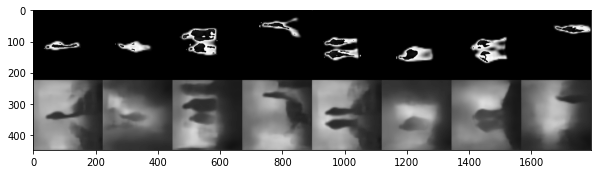

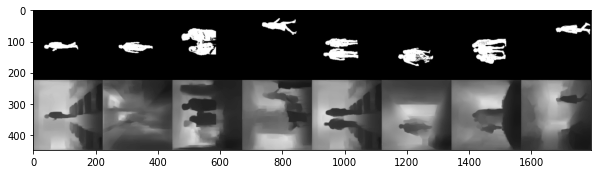

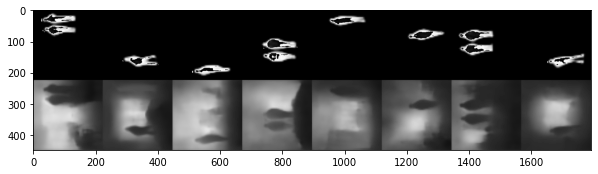

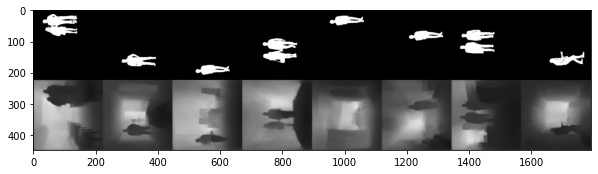

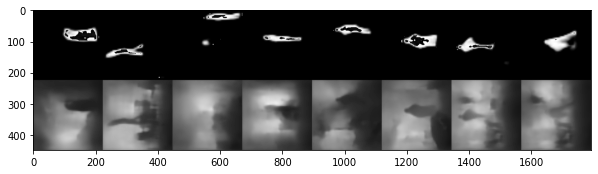

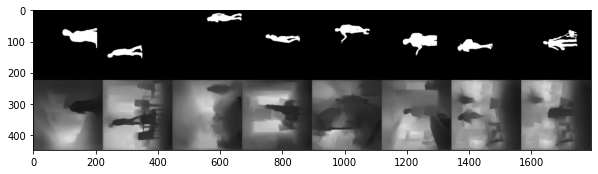

In [0]:
mmdtraintest.display_samples_new(expand_model, test_loader, device)

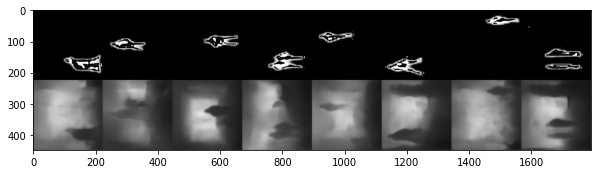

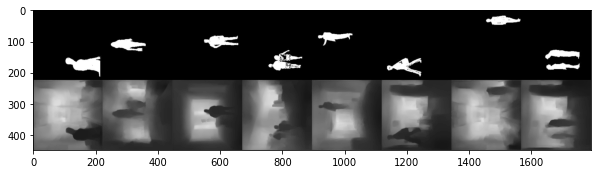

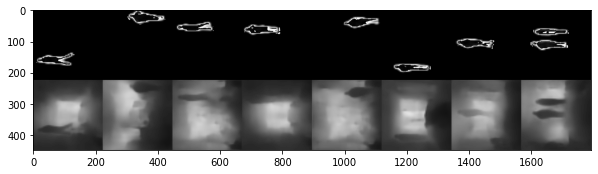

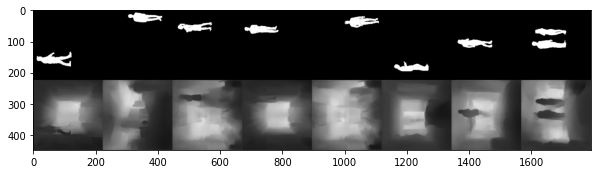

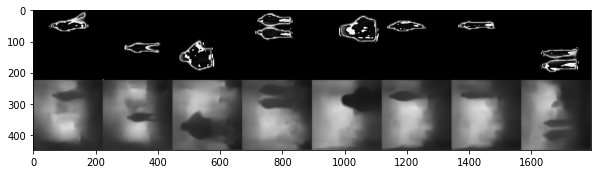

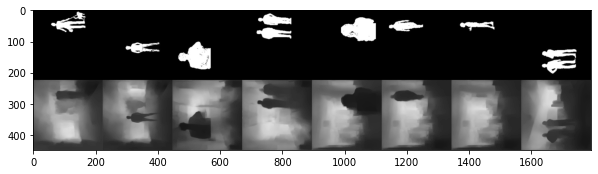

In [0]:
mmdtraintest.display_samples_new(expand_model, test_loader, device)

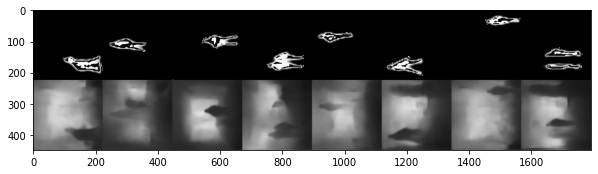

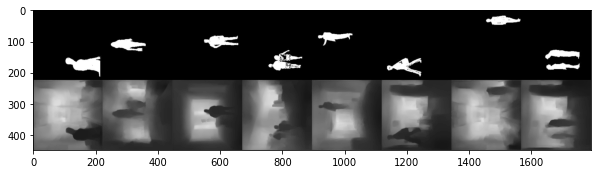

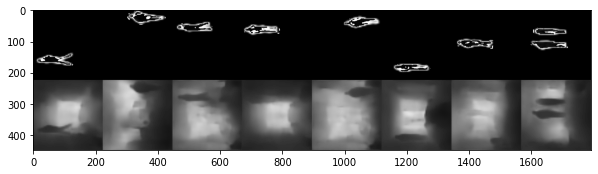

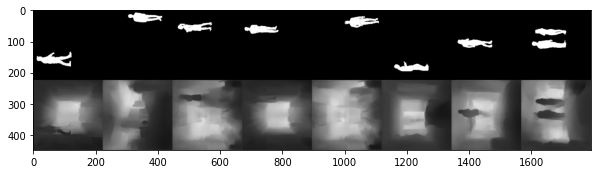

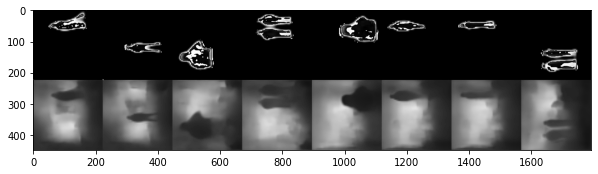

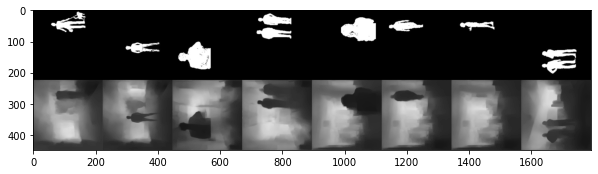

In [0]:
mmdtraintest.display_samples_new(expand_model, test_loader, device)

In [0]:
#with torch.no_grad():
#    output_val = expand_model(img[0].to(device)).to("cpu")

In [0]:
mylocaltensor = img[1].clone()

In [0]:
mmdlosses.dice_loss(output_pred[0], img[1])/ mmdlosses.dice_loss(img[1], img[1])

tensor(1.0091)

In [0]:
mmdlosses.relative_dice_loss(output_pred[0], img[1])

tensor(0.0091)

In [0]:
with torch.no_grad():
    output_val = expand_model(img[0].to(device))

In [0]:
output_pred = torch.split(output_val,1,dim=1)


In [0]:
cmap='gray'
img = iter(train_loader).next()
with torch.no_grad():
    output_val = expand_model(img[0].to(device)).to("cpu")
output_pred = torch.split(output_val,1,dim=1)
# mask_pred = [kornia.tensor_to_image(((output_pred[0][val].to("cpu")*0.0016620444341229432+0.057950844077600344)*255).byte()) for val in range(8) ]
# depth_pred = [kornia.tensor_to_image(((output_pred[1][val].to("cpu")*0.03551773442719045+0.3679109312239146)*255).byte()) for val in range(8) ]

mask_pred = [kornia.tensor_to_image((output_pred[0][val].to("cpu")*255).byte()) for val in range(8) ]
depth_pred = [kornia.tensor_to_image((output_pred[1][val].to("cpu")*255).byte()) for val in range(8) ]


img_shape = img[0][1].shape[1]
mask_gt = [img[1][val].reshape(img_shape,img_shape) for val in range(8) ]
depth_gt = [img[2][1][val].reshape(img_shape,img_shape) for val in range(8) ]
#plt.figure(figsize=(10,10)) 
#plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap=cmap)

TypeError: ignored

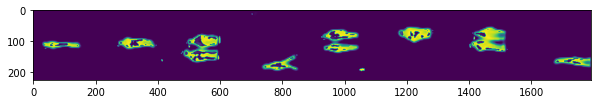

In [0]:
plt.figure(figsize=(10,10)) 
#plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap=cmap)
plt.imshow(np.hstack(mask_pred))

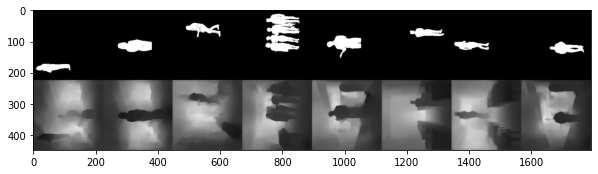

In [0]:
plt.figure(figsize=(10,10)) 

plt.imshow(np.vstack([np.hstack(mask_gt),np.hstack(depth_gt)]),cmap=cmap)

# Misc


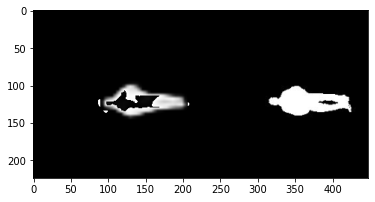

In [0]:
offset=7
plt.imshow(np.hstack([mask_pred[offset],mask_gt[offset]*255]), cmap=cmap)

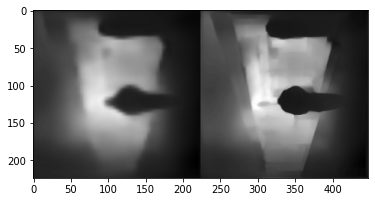

In [0]:
plt.imshow(np.hstack([depth_pred[offset],depth_gt[offset]*255]), cmap=cmap)
#plt.imshow(depth_pred[offset], cmap='gray')

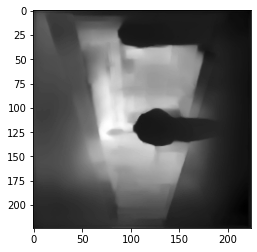

In [0]:
plt.imshow(depth_gt[offset]*255, cmap='gray')

In [0]:
torch.mean(mmdlosses.LocalL1Loss(img['output'][0][1], output_pred[0][1]))

tensor(12.1142)

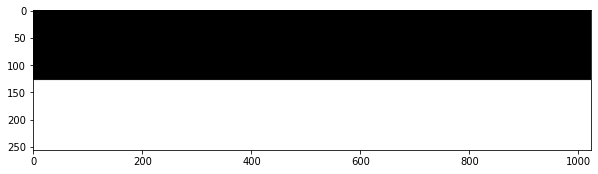

In [0]:
img = iter(train_loader).next()
with torch.no_grad():
    output_val = model_new(img['input'].to(device)).to("cpu")
output_pred = torch.split(output_val,1,dim=1)
# mask_pred = [kornia.tensor_to_image(((output_pred[0][val].to("cpu")*0.0016620444341229432+0.057950844077600344)*255).byte()) for val in range(8) ]
# depth_pred = [kornia.tensor_to_image(((output_pred[1][val].to("cpu")*0.03551773442719045+0.3679109312239146)*255).byte()) for val in range(8) ]

mask_pred = [kornia.tensor_to_image((output_pred[0][val].to("cpu")*255).byte()) for val in range(8) ]
depth_pred = [kornia.tensor_to_image((output_pred[1][val].to("cpu")*255).byte()) for val in range(8) ]


img_shape = img['output'][0][1].shape[1]
mask_gt = [img['output'][0][val].reshape(img_shape,img_shape) for val in range(8) ]
depth_gt = [img['output'][1][val].reshape(img_shape,img_shape) for val in range(8) ]
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

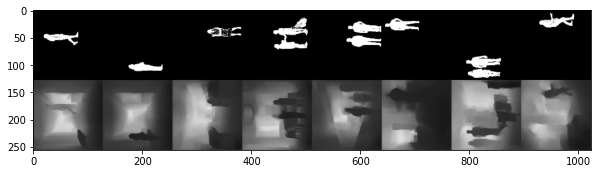

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_gt),np.hstack(depth_gt)]),cmap='gray')

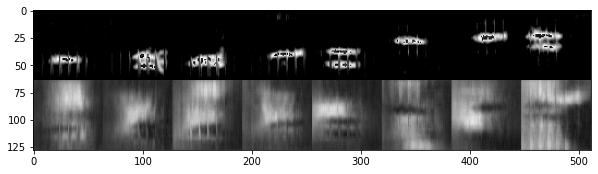

In [0]:
# plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

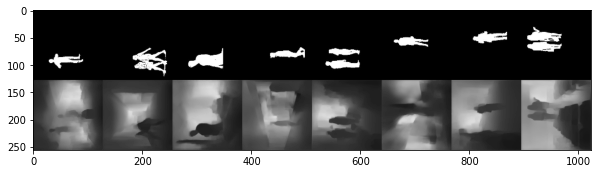

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_gt),np.hstack(depth_gt)]),cmap='gray')

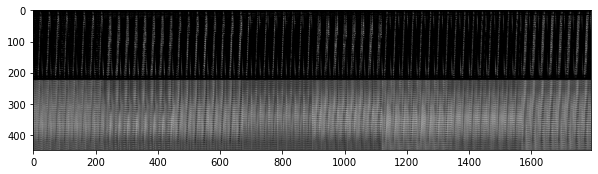

In [0]:
img = iter(train_loader_224).next()
with torch.no_grad():
    output_val = model_new(img['input'].to(device)).to("cpu")

output_pred = torch.split(output_val,1,dim=1)
mask_pred = [kornia.tensor_to_image((output_pred[0][val].to("cpu")*255).byte()) for val in range(8) ]
depth_pred = [kornia.tensor_to_image((output_pred[1][val].to("cpu")*255).byte()) for val in range(8) ]
mask_gt = [img['output'][0][val].reshape(224,224) for val in range(8) ]
depth_gt = [img['output'][1][val].reshape(224,224) for val in range(8) ]
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')


### bce_dice_with_rmse_ssim

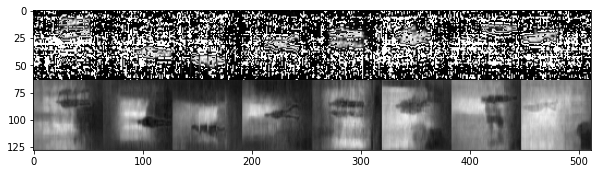

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

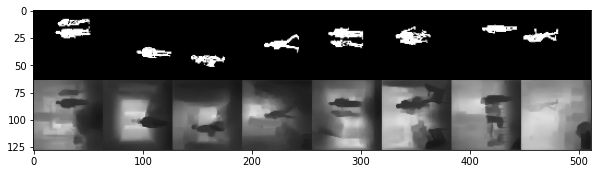

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_gt),np.hstack(depth_gt)]),cmap='gray')

In [0]:
plt.imshow(np.hstack([img['output'][1][offset].reshape(64,64),   depth_pred[offset]]),cmap='gray')

## bce_with_rmse

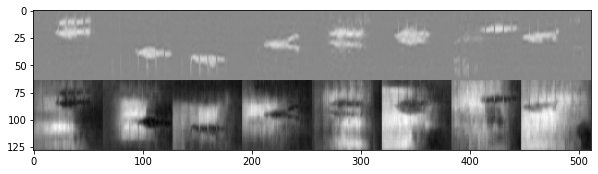

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

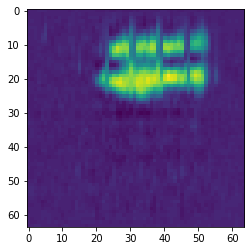

In [0]:
plt.imshow(mask_pred[0])

In [0]:
dice_loss(img['output'][0], output_pred[0])

tensor(0.8533)

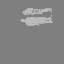

In [0]:
Image.fromarray(kornia.tensor_to_image(((torch.sigmoid(img['output'][0])*255).byte()[0])))

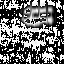

In [0]:
Image.fromarray(kornia.tensor_to_image(((output_pred[0]*255).byte()[0])))

In [0]:
Image.fromarray(kornia.tensor_to_image(((torch.sigmoid(output_pred[0])*255).byte()[0])))

In [0]:
kornia.losses.dice_loss((img['output'][0]*255), (output_pred[0]*255))

In [0]:
output_pred[0].shape

torch.Size([64, 1, 64, 64])

In [0]:
dice_loss(img['output'][0][0], output_pred[0][0])

tensor(0.8170)

In [0]:
def dice_loss(input, target):
    input = torch.sigmoid(input)
    smooth = 1.
    
    iflat = input.view(-1)
    tflat = target.contiguous().view(-1)#reshape(64*64*64)
    #target.view(-1)
    intersection = (iflat * tflat).sum()
    
    return 1 - ((2. * intersection + smooth) /
              (iflat.sum() + tflat.sum() + smooth))

In [0]:
nn.BCEWithLogitsLoss()(img['output'][0], output_pred[0])

tensor(0.6849)

In [0]:
len(mask_pred)

8

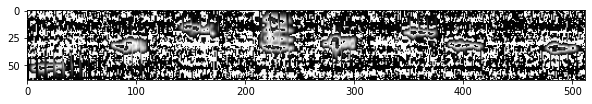

In [0]:
#Image.fromarray(kornia.tensor_to_image((mask_pred*255).byte())),
plt.figure(figsize=(10,10)) 
plt.imshow(np.hstack(mask_pred),cmap='gray')

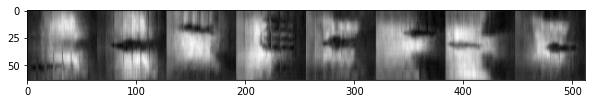

In [0]:
#Image.fromarray(kornia.tensor_to_image((mask_pred*255).byte())),
plt.figure(figsize=(10,10)) 
plt.imshow(np.hstack(depth_pred),cmap='gray')#

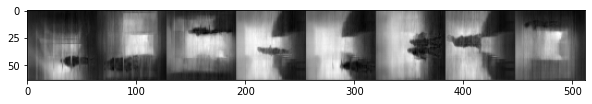

In [0]:


Image.fromarray(kornia.tensor_to_image((mask_pred*255).byte())),
plt.figure(figsize=(10,10)) 
plt.imshow(np.hstack(depth_pred),cmap='gray')#

In [0]:
!pip install kornia

     |████████████████████████████████| 163kB 6.0MB/s 


In [0]:
for zip(img['input'][0],img['input'][1])

In [0]:
np.concatenate((img['input'][0][0].numpy(),img['input'][0][1].numpy()), axis=2).shape

(250, 250, 6)

In [0]:
 
pbar = tqdm(depth_dataset)

#bg_mean = np.zeros((4,3))
n, mean, M2 = (0.0,0.0,0.0)
for i_batch,img in enumerate(pbar):
    #img = depth_dataset[i_batch]
    #img_mean = np.mean(img, axis=(0,1))
    img_mean = np.array([ np.mean(iter_val/255.0,axis=(0,1)) for left_k,right_v in img.items() for iter_val in right_v ])
    n, mean, M2 = update_mean_variance((n, mean, M2), img_mean)

print(finalize_mean_variance(n, mean, M2))

In [0]:
# hf = h5py.File('data7.h5', 'w')
# #base_zip = ZipFile('/content/image_mask_gt2k6k.zip')
# #pbar = tqdm(depth_dataset)
# #hf.close()
# def hf_create_dataset(hdf_file, file_name, data):
#     hdf_file.create_dataset(
#                 name=file_name,
#                 data=data,
#                 compression="gzip", compression_opts=9
#                 )
# i_batch=0
# #for i_batch,img in enumerate(pbar):
# start = time.process_time()
# #try:
# for img in depth_dataset:
#     #key_name = 
#     if(i_batch > 100000):
#         break
#     #val_arr = [iter_val 
#     for left_k,right_v in img.items():
#         for inner_k, iter_val in right_v.items():
#             #print(inner_k)
#             hf_create_dataset(hf, inner_k ,iter_val)

#     if(i_batch % 1000 == 0 and i_batch > 1000):
#         current = time.process_time()
#         print("No:of records processed:{} Time Elapsed:{}".format(i_batch, current-start))
#     i_batch += 1

# end = time.process_time()
# print("No:of records processed:{} Time Elapsed:{}".format(i_batch, end-start))
# #except:

# #    hf.close()

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

In [0]:
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

body = {
  'name': bucket_name,
  # For a full list of locations, see:
  # https://cloud.google.com/storage/docs/bucket-locations
  'location': 'us',
}
gcs_service.buckets().insert(project=project_id, body=body).execute()
print('Done')

In [0]:
hf.close()

In [0]:
hf_read = h5py.File('data7.h5', 'r')

In [0]:
hf_read.keys()

<KeysViewHDF5 ['depth_image_023aa22186_classroom_1.jpg', 'depth_image_0ccf0b6adb_classroom_8.jpg', 'depth_image_0d06379c4e_classroom_12.jpg', 'depth_image_100078863e_classroom_10.jpg', 'depth_image_1000d68e48_classroom_2.jpg', 'depth_image_10023ed777_classroom_12.jpg', 'depth_image_10027aa3fa_classroom_4.jpg', 'depth_image_1002953763_classroom_1.jpg', 'depth_image_1002a448f4_classroom_10.jpg', 'depth_image_1002be3508_classroom_3.jpg', 'depth_image_1002e52563_classroom_14.jpg', 'depth_image_1002e75f62_classroom_15.jpg', 'depth_image_100317e99d_classroom_14.jpg', 'depth_image_1003212d72_classroom_8.jpg', 'depth_image_10033c4a69_classroom_8.jpg', 'depth_image_10038181d7_classroom_3.jpg', 'depth_image_1003ffcca2_classroom_10.jpg', 'depth_image_1004993b2d_classroom_13.jpg', 'depth_image_1004dd5dd3_classroom_16.jpg', 'depth_image_100659c8dd_classroom_17.jpg', 'depth_image_1006609a43_classroom_16.jpg', 'depth_image_10074a3520_classroom_8.jpg', 'depth_image_1007f75489_classroom_8.jpg', 'depth_

In [0]:
### Knuth/Welford algorithm to generate mean by addition of new samples to existing mean

def update_mean_variance(existingAggregate, newValue):
    (count, mean, M2) = existingAggregate
    count += 1
    delta = newValue - mean
    mean += delta / count
    delta2 = newValue - mean
    M2 += delta * delta2

    return (count, mean, M2)

# Retrieve the mean, variance and sample variance from an aggregate
def finalize_mean_variance(existingAggregate):
    (count, mean, M2) = existingAggregate
    if count < 2:
        return float('nan')
    else:
       (mean, variance, sampleVariance) = (mean, M2 / count, M2 / (count - 1))
       return (mean, variance, sampleVariance)

In [0]:
calc_mean,variance, _ = finalize_mean_variance((n, mean, M2))
print(calc_mean)
print(np.sqrt(variance))

[[0.56632738 0.51567622 0.45670792]
 [0.57469445 0.52241555 0.45992244]
 [0.05795104 0.05795104 0.05795104]
 [0.61635181 0.21432114 0.50569604]]
[[0.1076622  0.10650349 0.12808967]
 [0.11322354 0.11195428 0.13441683]
 [0.02640032 0.02640032 0.02640032]
 [0.09193359 0.07619106 0.04919082]]


In [0]:
#depth_map = np.hstack([depth_dataset[index_val]['output'][1] for index_val in myrandom_array])
depth_map = [depth_dataset[index_val]['output'][1] for index_val in myrandom_array]
mask_image = [depth_dataset[index_val]['output'][0] for index_val in myrandom_array]
bg_image = [depth_dataset[index_val]['input'][1] for index_val in myrandom_array]
fg_bg_image = [depth_dataset[index_val]['input'][0] for index_val in myrandom_array]
final_list = np.hstack([ mask_image, bg_image, fg_bg_image])

In [0]:
from matplotlib import pyplot as plt

In [0]:
plt.figure(figsize=(24,32))
plt.imshow(depth_map,cmap='gray')

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(100., 100.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 20),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, im in zip(grid, depth_map):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [0]:
plt.savefig('/content/drive/My Drive/EVA4/tsai/S15EVA4/depthmaptile.png')

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(100., 100.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 20),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, im in zip(grid, final_list):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [0]:
Image.fromarray(depth_dataset[0]['output'][0])

In [0]:
Image.fromarray(depth_dataset[0]['output'][1])

In [0]:
import glob
fileList = [file_name for file_name in glob.glob('/content/drive/My Drive/EVA4/tsai/S15EVA4/people_cropresize/*png')]
print("Number of images of people:{}".format(len(fileList)))

Number of images of people:110


In [0]:
import os

for file_name in fileList:
    image_name = os.path.basename(file_name)
    my_array = np.array(Image.open(file_name))
    print("FileName: {} Shape:{}".format(image_name, my_array.shape))

In [0]:
base_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/people_cropresize/'
aug_path = '/content/drive/My Drive/EVA4/tsai/S15EVA4/people_cropresize/aug_images'
image_list = [ ]


for file_name in glob.glob(base_dir+"/*png")[:20]:
    basefile_name = os.path.basename(file_name)
    #print(basefile_name)
    mask_name = os.path.join(aug_path,"mask_"+basefile_name)
    flip_name = os.path.join(aug_path,"flip_"+basefile_name)
    flip_mask_name = os.path.join(aug_path,"mask_"+os.path.basename(flip_name))
    print(file_name,mask_name,flip_name,  flip_mask_name)
    image_list.append([np.array(Image.open(val)) for val in [file_name,mask_name,flip_name,  flip_mask_name ]])

In [0]:
for val in image_list:
    plt.imshow(np.hstack([val[0],val[2]]))
    plt.imshow(np.hstack([val[1],val[3]]))

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
#for iter in image_list:
for ax, im in zip(grid, image_list[2]):
    #print(ax., )
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='gray')

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [0]:
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [0]:
model.summary()

In [0]:
#csv_file = '/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetSample.csv'
batch_start = 90000
batch_end = batch_start+30000

test_batch_start = 512
test_batch_end = test_batch_start + 1512
csv_file ='/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTrain.csv'
root_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/'
size_hw = (128,128)
depth_dataset = mmddataloader.DepthMaskDataSet(csv_file, root_dir, batch_start,batch_end, read_zip=True,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                  transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                  transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':1,'pin_memory': True}
train_loader = DataLoader(depth_dataset, batch_size=64, shuffle=False, **kwargs)

test_dataset = mmddataloader.DepthMaskDataSet(csv_file, root_dir, test_batch_start,test_batch_end,read_zip=True,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                 transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':1,'pin_memory': True}
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, **kwargs)